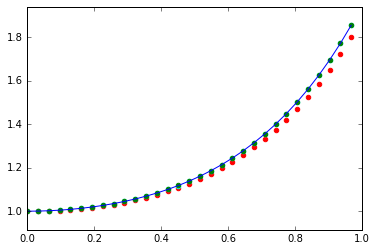

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

def f(t,y):
    return t*y + t**3

def euler(f,ta,tb,y0,n):
    h = (tb-ta)/(n+1.0)
    y = np.zeros(n+1)
    t = ta
    y[0] = y0
    for i in range(1,n+1):
        y[i] = y[i-1] + h*f(t,y[i-1])
        t = t + h
    return y

def trapezoid(f,ta,tb,y0,n):
    h = (tb-ta)/(n+1.0)
    y = np.zeros(n+1)
    t = ta
    y[0] = y0
    for i in range(1,n+1):
        y[i] = y[i-1] + h*(f(t,y[i-1])+f(t+h,y[i-1]+h*f(t,y[i-1])))/2.0
        t = t + h
    return y

def rk4(f,ta,tb,y0,n):
    h = (tb-ta)/(n+1.0)
    y = np.zeros(n+1)
    t = ta
    y[0] = y0
    for i in range(1,n+1):
        k1 = f(t,y[i-1])
        k2 = f(t+h/2.0,y[i-1]+h*k1/2.0)
        k3 = f(t+h/2.0,y[i-1]+h*k2/2.0)
        k4 = f(t+h,y[i-1]+h*k3)
        y[i] = y[i-1] + h*(k1+2.0*k2+2.0*k3+k4)/6.0
        t = t + h
    return y

ta = 0.0
tb = 1.0
n  = 30
h = (tb-ta)/(n+1.0)
y0 = 1.0
T = np.zeros(n+1)
Y = np.zeros(n+1)
for i in range(n+1):
    T[i] = ta + i*h
    Y[i] = 3.0*math.exp((T[i]**2)/2.0)-T[i]**2-2.0

Yeuler = euler(f,ta,tb,y0,n) 
Ytrap = trapezoid(f,ta,tb,y0,n) 
Yrk4 = rk4(f,ta,tb,y0,n) 
plt.plot(T,Y,color='blue')
plt.scatter(T,Yeuler,color='red')
plt.scatter(T,Yrk4,color='cyan')
plt.scatter(T,Ytrap,color='green')
deltat = tb - ta
plt.xlim(ta, tb)
ymin = min(Y)
ymax = max(Y)
deltay = (ymax-ymin)
plt.ylim(ymin-0.1*deltay,ymax+0.1*deltay)
plt.show()


In [31]:
for j in range(10,110,10):
    Ye = euler(f,ta,tb,y0,j)
    Yt = trapezoid(f,ta,tb,y0,j)
    Yr = rk4(f,ta,tb,y0,j)
    print(j,abs(Ye[j]-3.0*(math.exp(0.5)-1.0)),abs(Yt[j]-3.0*(math.exp(0.5)-1.0)),abs(Yr[j]-3.0*(math.exp(0.5)-1.0)))


(10, 0.35709450063104509, 0.23666393111494832, 0.23756389093568209)
(20, 0.20588702227812861, 0.13143110539228076, 0.13169107601602992)
(30, 0.1444719240244754, 0.090918847193592445, 0.09103973733095394)
(40, 0.11125147368941279, 0.069487769754148276, 0.069557272482463128)
(50, 0.090445218187647392, 0.05623024869655846, 0.056275304533888848)
(60, 0.076192577583737986, 0.047220083191052309, 0.04725163654707476)
(70, 0.065819268874911074, 0.040698263949814795, 0.04072158431395434)
(80, 0.057931507326353548, 0.035759158718592143, 0.035777092531313892)
(90, 0.051731671152875025, 0.031889021859740962, 0.03190324029879088)
(100, 0.046730393396713144, 0.028774730448675623, 0.028786278747749972)


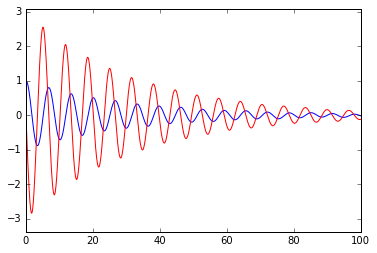

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

m = 1.0
g = 9.8
l = 1.0
d = 0.3
A = 0.1

ta = 0.0
tb = 100.0
y10 = 1.0
y20 = 0.0
n = 10000
T = np.zeros(n+1)
for i in range(n+1):
    T[i] = ta + i*h

def F(t,y1,y2):
    return y2,-g*math.sin(y1)/l-d*y2+A*math.sin(t)

def euler2d(f,ta,tb,y10,y20,n):
    h = (tb-ta)/(n+1.0)
    y1 = np.zeros(n+1)
    y2 = np.zeros(n+1)
    t = ta
    y1[0] = y10
    y2[0] = y20
    for i in range(1,n+1):
        f1,f2 = F(t,y1[i-1],y2[i-1])
        y1[i] = y1[i-1] + h*f1
        y2[i] = y2[i-1] + h*f2        
        t = t + h
    return y1,y2

S,V = euler2d(F,ta,tb,y10,y20,n) 
plt.plot(T,S,color='blue')
plt.plot(T,V,color='red')
deltat = tb - ta
plt.xlim(ta, tb)
ymin = min(min(S),min(V))
ymax = max(max(S),max(V))
deltay = (ymax-ymin)
plt.ylim(ymin-0.1*deltay,ymax+0.1*deltay)
plt.show()
